<a href="https://colab.research.google.com/github/Reetubharti20/projects/blob/master/Production_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Time-series analysis is a statistical technique that deals with time-series data, or trend analysis.
* It involves the identification of patterns, trends, seasonality, and irregularities in the data observed over different time periods.

* Time-series analysis isn't about predicting the future; instead, it's about understanding the past.

**Application**
* Weather forecasting
* E-commerce and retail
* Healthcare
* Energy consumption
* Manufacturing and supply chain
* Web traffic and user behavior

To correctly analyze time-series data, we need to look to the four components of a time series:

* Trend
* Seasonality
* Cyclicity
* Irregularity

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
text_file = "/content/drive/MyDrive/Machine learning/TimeSeries/time_forecast.txt"
file1 = open(text_file, "r")

In [117]:
df = pd.read_csv(file1)

EmptyDataError: No columns to parse from file

In [118]:
#df.head()

In [119]:
df['Date']=pd.to_datetime(df['Date'])
df.index=df['Date']  #making date column as index column


In [120]:
del df['Date']

In [121]:
df.rename(columns={"Value": "Production(Thousand)"})

,Production(Thousand)
Date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [123]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df['Production(Thousand)'])
print(adf)

(3.14518568930673, 1.0, 15, 188, {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}, 549.6705685364174)


p-value is >0.05 (critical value)
data is not stationary


Text(0.5, 1.0, 'Rolling Mean & statandard deviation')

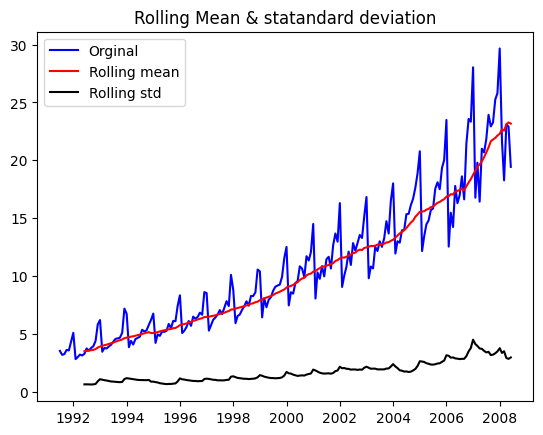

In [124]:
mean_df=df.rolling(window=12).mean()
std_df=df.rolling(window=12).std()

plt.plot(df,color='blue',label='Orginal')
plt.plot(mean_df,color='red',label='Rolling mean')
plt.plot(std_df,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & statandard deviation')

Standard deviation curve is not smooth. we need to smoothen it

<Axes: xlabel='Date'>

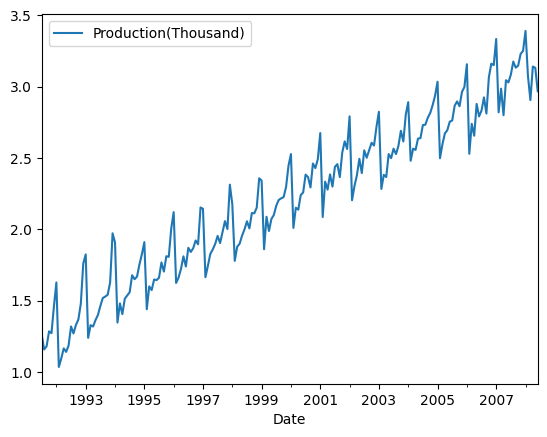

In [125]:

first_log=np.log(df)
first_log = first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & statandard deviation')

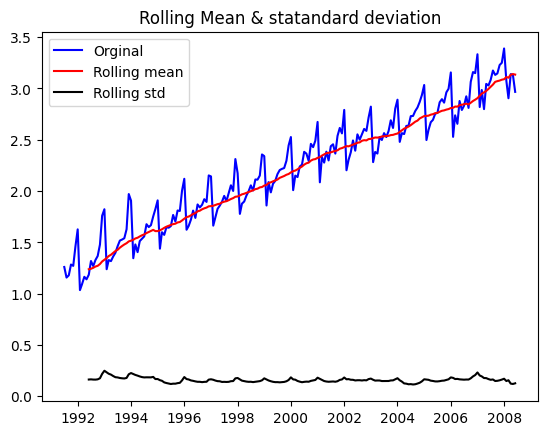

In [126]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

plt.plot(first_log,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & statandard deviation')

In [128]:
adf1 = adfuller(first_log['Production(Thousand)'])
print(adf1)

(-0.9887334889479363, 0.7573512901699067, 14, 189, {'1%': -3.4654311561944873, '5%': -2.8769570530458792, '10%': -2.574988319755886}, -455.4101396222758)


not stationary

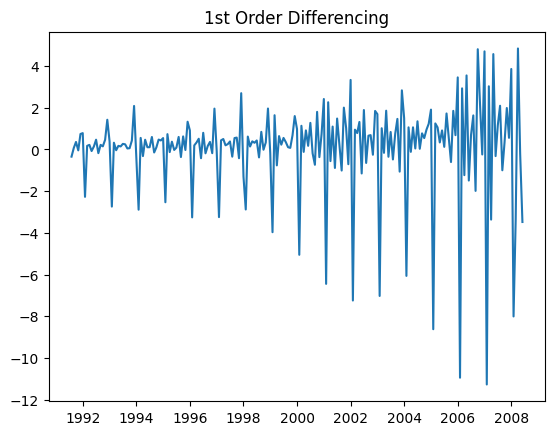

In [131]:
# Apply 1st order differencing and plot the result

df['diff1'] = df['Production(Thousand)'].diff()
plt.plot(df.diff1)
plt.title('1st Order Differencing')

plt.show()

In [132]:
adf2 = adfuller(df.diff1.dropna())
print(adf2)
if adf2[1]>0.05:
  print('Data is not stationary')
else:
  print('data is stationary')


(-2.4951721474497393, 0.11665341686468789, 15, 187, {'1%': -3.465811691080702, '5%': -2.877123351472649, '10%': -2.5750770662586864}, 547.1880809726354)
Data is not stationary


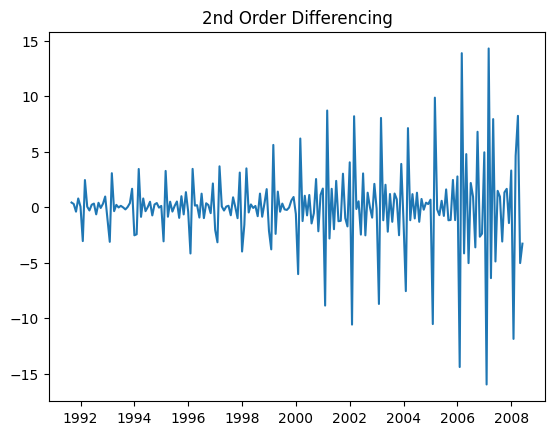

In [133]:
# Apply 2nd order differencing and plot the result
df['diff2'] = df.diff1.diff()
plt.plot(df.diff2)
plt.title('2nd Order Differencing');
# plot_acf(df.diff2.dropna());
# plot_pacf(df.diff2.dropna());
plt.show()

In [134]:
adf3 = adfuller(df.diff2.dropna())
print(adf3)
if adf3[1]>0.05:
  print('Data is not stationary')
else:
  print('data is stationary')

(-10.29230470651732, 3.543916358529341e-18, 14, 187, {'1%': -3.465811691080702, '5%': -2.877123351472649, '10%': -2.5750770662586864}, 548.896019437343)
data is stationary


Text(0.5, 1.0, 'Rolling Mean & statandard deviation')

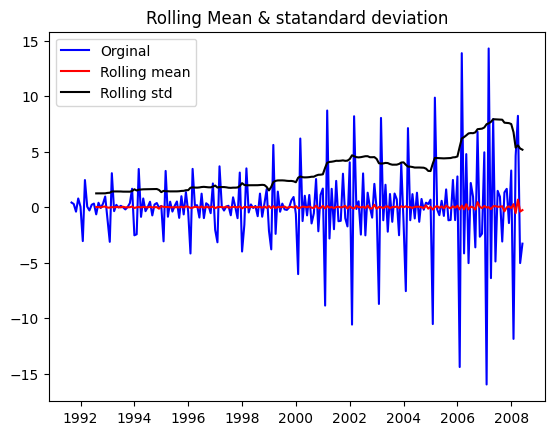

In [135]:
mean_diff2=df['diff2'].rolling(window=12).mean()
std_diff2=df['diff2'].rolling(window=12).std()

plt.plot(df['diff2'],color='blue',label='Orginal')
plt.plot(mean_diff2,color='red',label='Rolling mean')
plt.plot(std_diff2,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & statandard deviation')

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose #visual representation of seasonal decompose

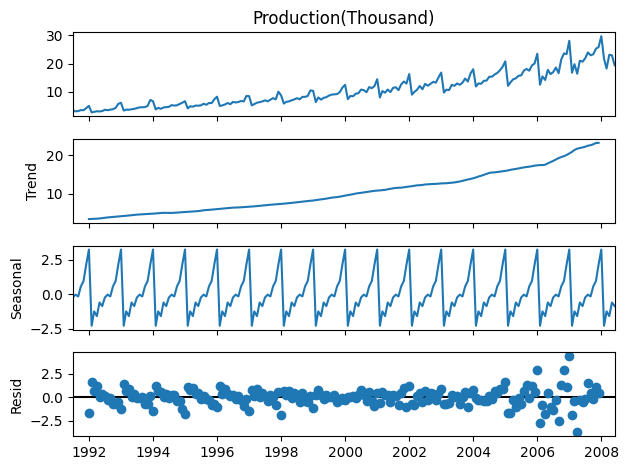

In [137]:
#seasonal decompose
old_decompose=seasonal_decompose(df['Production(Thousand)'].dropna())
old_decompose.plot();

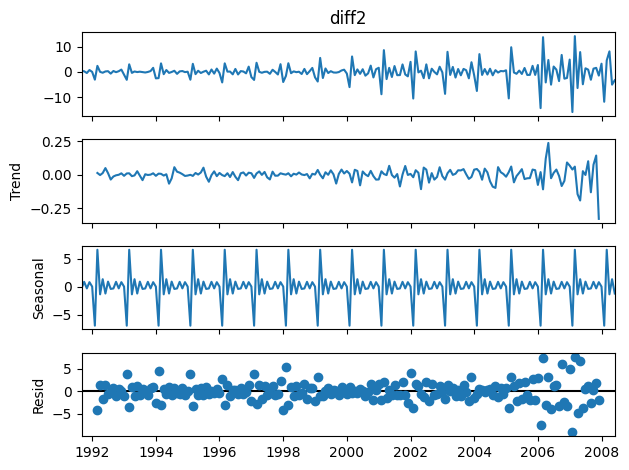

In [138]:
new_decompose=seasonal_decompose(df['diff2'].dropna())
new_decompose.plot();

In [139]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

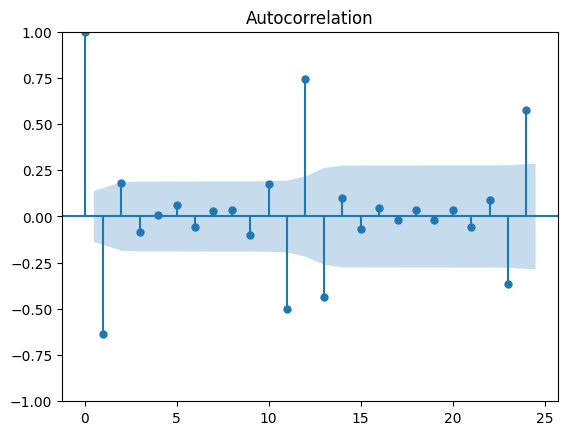

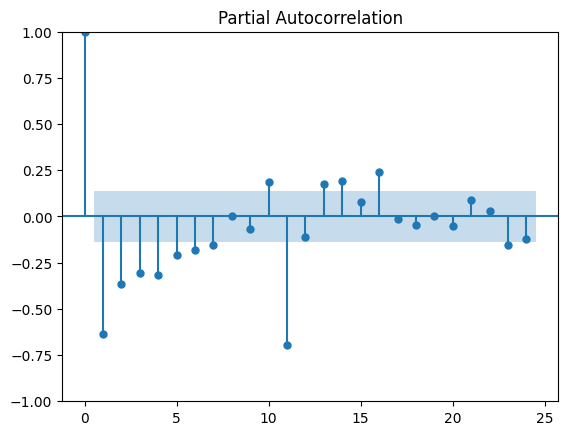

In [140]:

plot_acf(df.diff2.dropna());
plot_pacf(df.diff2.dropna());


In [141]:
!pip install pmdarima

In [142]:
from pmdarima import auto_arima

In [144]:
arima_model=auto_arima(df['Production(Thousand)'],seaonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=836.293, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=906.891, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=879.586, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=858.886, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=905.140, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=845.561, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=845.350, Time=0.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=838.121, Time=1.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=822.318, Time=2.51 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=845.723, Time=1.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=831.067, Time=3.16 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=830.248, Time=2.48 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=847.673, Time=0.80 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=3.16 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=859.416, 

In [145]:
arima_model_new=auto_arima(df['diff2'].dropna(),seaonal=True,trace=True) #apply model on stationary data

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1105.388, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1003.264, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1103.392, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=973.335, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=954.823, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=935.534, Time=0.38 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=928.187, Time=0.45 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.57 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=926.221, Time=0.25 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=933.553, Time=0.30 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=2.76 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.68 sec

Be

In [146]:
len(df)

204

In [147]:
from statsmodels.tsa.arima.model import ARIMA
train = df.iloc[:160]['diff2']
test = df.iloc[160:]['diff2']
model = ARIMA(train, order=(5,0,0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  diff2   No. Observations:                  160
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -304.640
Date:                Tue, 26 Mar 2024   AIC                            623.281
Time:                        08:30:05   BIC                            644.807
Sample:                    07-01-1991   HQIC                           632.022
                         - 10-01-2004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.048      0.060      0.952      -0.091       0.097
ar.L1         -1.1330      0.171     -6.633      0.000      -1.468      -0.798
ar.L2         -1.0351      0.257     -4.026      0.000      -1.539      -0.531
ar.L3         -0.8126      0.235     -3.462      0.001      -1.273      -0.353
ar.L4         -0.5656      0.169     -3.351      0.001      -0.896      -0.235
ar.L5         -0.3086      0.116     -2.670      0.008      -0.535      -0.082
sigma2         2.7356      0.313      8.740      0.000       2.122       3.349
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):               393.93
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               5.42   Skew:                            -2.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

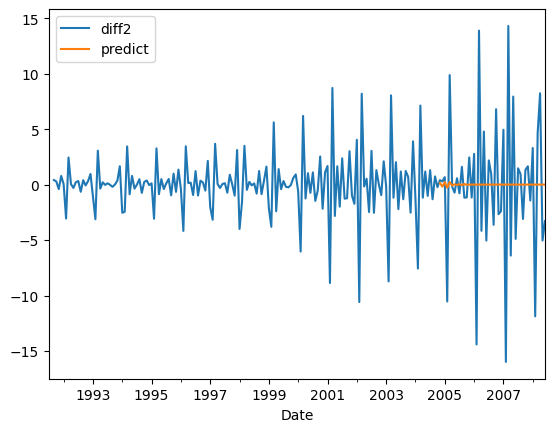

In [148]:
df['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
df[['diff2','predict']].plot()

In [149]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [150]:
model=SARIMAX(train,order=(5,0,0),seasonal_order=(5,0,0,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<Axes: xlabel='Date'>

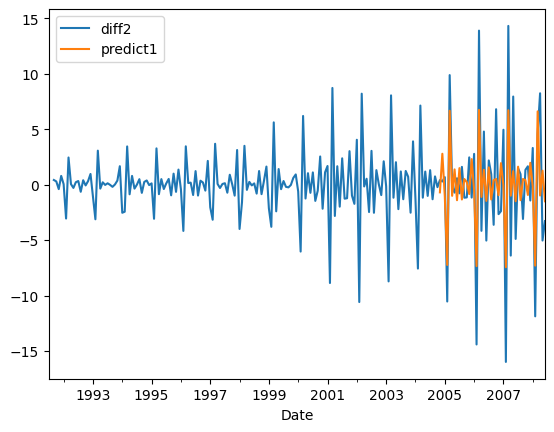

In [151]:
df['predict1']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
df[['diff2','predict1']].plot()

<Axes: xlabel='Date'>

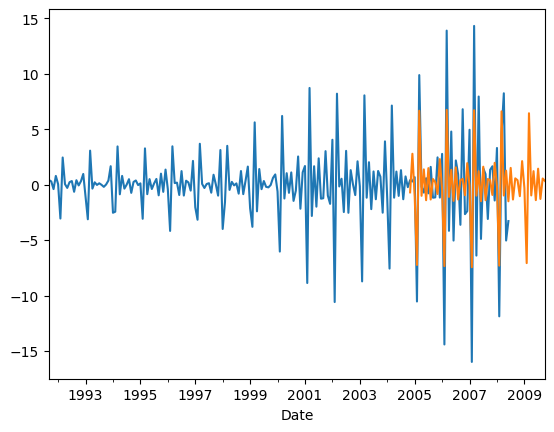

In [152]:
forecast=model.forecast(steps=60)
df.diff2.dropna().plot()
forecast.plot()